# Monte Carlo Simulation

The modern version of the Monte Carlo method was invented in the late 1940s by Stanislaw Ulam, while he was working on nuclear weapons projects at the Los Alamos National Laboratory. 

Monte Carlo methods, or experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results; the underlying concept is to use randomness to solve problems that might be deterministic in principle. Monte Carlo methods are mainly used in three problem classes: optimization, numerical integration, and generating draws from a probability distribution. 

Monte Carlo simulation is widely used in many fields: Engineering,
Physics, Computational biology, Computer graphics, Applied statistics,
Artificial intelligence for games, Search and rescue and of course
Finance and business.

### The Algorithm
In principle, Monte Carlo methods can be used to solve any problem having a probabilistic interpretation. By the law of large numbers, the expected value of some random variable can be approximated by taking the empirical mean of independent samples of the variable. 

$$ \mu_n = \cfrac{1}{n}\sum_i^n Y_i $$

Monte Carlo methods in general have the following pattern:

* define a domain of possible inputs;
* generate inputs randomly from a probability distribution over the domain defined above;
* perform a deterministic computation on the inputs;
* aggregate the results.

## Pseudo-Random Numbers

Monte Carlo methods require large amounts of random numbers to generate the inputs, and it was their use that spurred the development of pseudorandom number generators. 

This is the main reason why every programming language has libraries that allows to produce huge series of random numbers (with a periodicity of $2^{19937}$).
Those numbers are produced by algorithms that take as input a *seed* which determines univokely the series. This means that setting the same seed you will produce the same set of numbers every time (which is great for debugging purpouses).

In $\tt{python}$ the right module to use is `random` which has the following useful functions:

* `seed` set the seed of the random number generator;
* `random` returns a random number between 0 and 1 (with uniform probability);
* `randint(min, max)` returns an integer random number between `min` and `max` (with uniform probability);
* `sample(aList, k=n)` samples n elements from the list `aList`.

As usual for a more detailed description check `help(random)`.

In [87]:
# test seed number and sample
import random 

random.seed(1)
print ("seed is 1")
print(random.random())
print(random.random())

random.seed(2)
print ("seed is 2")
print(random.random())
print(random.random())

random.seed(1)
print ("seed is 1 again")
print(random.random())
print(random.random())

print(random.randint(1, 10))
aList = ['a', 'b', 'c', 'd', 'f']
print (random.sample(aList, k=2))

seed is 1
0.13436424411240122
0.8474337369372327
seed is 2
0.9560342718892494
0.9478274870593494
seed is 1 again
0.13436424411240122
0.8474337369372327
2
['c', 'a']


Below an example of uniform distribution.

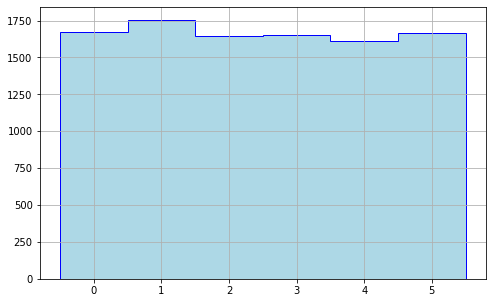

In [89]:
# uniform distrobution
numbers = []
for _ in range(10000):
  numbers.append(random.randint(0, 5))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,5))
plt.hist(numbers, 6, range=[-0.5, 5.5], color='lightblue', edgecolor="blue", histtype='stepfilled')
plt.grid(True)
plt.show()

Other modules provide random number generators. Below an example with `numpy.random` which allows among others to throw random numbers according to a standard normal distribution ($\mathcal{N}(0, 1)$).

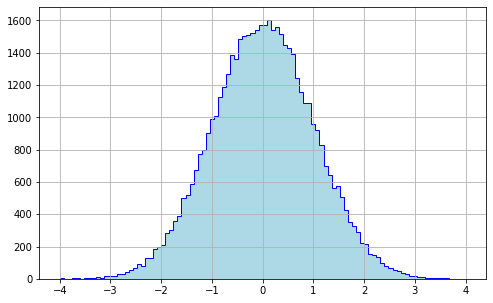

In [90]:
# normal distribution
from numpy.random import normal, seed
from matplotlib import pyplot as plt

seed(1)
gauss = []
for _ in range(50000):
  gauss.append(normal())

fig = plt.figure(figsize=(8,5))
plt.hist(gauss, 100, range=[-4, 4], color='lightblue', edgecolor="blue", histtype='stepfilled')
plt.grid(True)
plt.show()

#### Example of Monte Carlo Simulation

Let's check the probability to get two kings drawing randomly two cards from a deck.
Using a frequentist approach, we can calculate the probability of an event as the ratio of the number of favorable outcomes of an experiment (number of successes) and the number of all possible outcomes so for our example:

$$P_\textrm{two kings} = \frac{4}{40} \cdot \frac{3}{39} = \frac{1}{130} \approx 0.0077$$

Let's now try with a Monte Carlo simulation.

In [91]:
# define the domain of inputs
from random import sample, choices, seed

seed(1)
deck = ["A", "2", "3", "4", "5", "6", "7", "J", "Q", "K"] * 4

In [92]:
# sampling inputs 

trials = 10000
successes = 0

for i in range(trials):
  cards = sample(deck, k=2)
  if i < 10:
    print (cards)
  if cards == ["K", "K"]:
    successes += 1
    
print ("The probability to draw two kings is {:.4f}".format(successes/trials))

['Q', '7']
['5', '7']
['J', '2']
['Q', 'A']
['5', '4']
['7', '2']
['2', '5']
['J', 'Q']
['A', 'Q']
['J', '5']
The probability to draw two kings is 0.0077


#### Another MC Example

Two dice are rolled, find the probability that the sum is:

* equal to 1;
* equal to 4;
* less than 13.

Before looking at the python implementation let’s compute what we should get: the possible
combinations of the outcomes of two dice are 36 (to realize it you can simply write them down). It is not possible to get 1 since thee dice have no face with 0 so the first probability should come out 0.
The sum of the two dice is always less than 13 (the maximum is 12...) so the answer to point 3 is 1.
We can get a sum of 4 in 3 cases (1-3, 3-1 or 2-2) so the probability will result 3/36 = 1/12 = 0.0833

In [93]:
# implment the MC
import random

random.seed(1)
successes = {"=0":0.0, "=4":0.0, "<13":0.0}
trials = 100000

for _ in range(trials):
    d1 = random.randint(1, 6)
    d2 = random.randint(1, 6)
    s = d1 + d2
    if s == 0:
        successes["=0"] += 1.0
    if s == 4:
        successes["=4"] += 1.0
    if s < 13:
        successes["<13"] += 1.0

for k,v in successes.items():
    print ("P({}): {:.3f}".format(k, v/trials))

P(=0): 0.000
P(=4): 0.084
P(<13): 1.000


### Accuracy of Monte Carlo SImulations

Since we rely on a frequentist approach naively we can say that the lower is the probability we need to estimate the higher has to be the number of simulated trials. This is because to get a reasonable number of "success" so that the uncertainty in the probability is small, we have to try many times. This is apparent playing with the number of trials in the above simulations.
Monte Carlo Simulation is not always the best approach to follow !

To quantify observe that from the law of large numbers is:

$$\mathbb{E}(\mu_n) = \cfrac{1}{n}\sum_i^n \mathbb{Y_i} = \mu $$

The variance on our best estimate of $\mu$ is:

$$ \mathbb{E}((\mu_n - \mu )^2) = \cfrac{\sigma^2}{n} $$
where $\sigma^2 = \mathrm{Var}(Y)$.

While it is obvious that the estimate should get worse with increased variance and better with increased sample size, this equation gives us the exact rate of exchange. The root mean squared error (RMSE) of $\mu_n = \sigma/\sqrt{n}$: 

* to get one more decimal digit of accuracy is like asking for an RMSE
one tenth as large, and that requires a 100-fold increase in computation. 
* to get three more digits of accuracy requires one million times as much computation. 

### Derivation of log-normal Stochastic Differential Equation

Stock prices deviate from a steady state as a result of the random fluctuations given by the trades. Considering a stock with a price $S_t$ and an expected rate of return $\mu$, then the relative change in its price during a period $dt$ can be decomposed in two parts:

* a deterministic part that is the expected return from the stock hold during the time period $dt$ ($\mu S_tdt$)
* a stochastic part which reflects the random changes of the market (e.g. as a response to external effects such as unexpected news). A reasonable assumption is to take this contribution proportional to the stock ($\sigma S_tdB_t$ where $dB_t$ is a random walk process equal to $\mathcal{N}(0,1)\sqrt{dt} = \epsilon\sqrt{dt}$).

The resulting differential equation is:

$$dS_t = \mu S_tdt + \sigma S_tdB_t$$
or
$$\frac{dS_t}{S_t} = d\textrm{log}(S_t) = \mu dt + \sigma dB_t$$

The solution of this equation can be derived by applying the It$\hat{o}$'s formula which states that for any given function $G(S, t)$ where $S$ satisfies the following stochastic differential equation $dS=a\cdot dt +b\cdot dB_t$ it holds:

$$dG=\big(a\frac{\partial G}{\partial S} + \frac{\partial G}{\partial t} + \frac{1}{2}b^2\frac{\partial^2 G}{\partial S^2} \big)dt + b \frac{\partial G}{\partial S}dB$$

Considering $G = \textrm{log}(S_t)$ we have:

$$\frac{\partial G}{\partial S} = \frac{\partial \mathrm{log}(S_t)}{\partial S} = \frac{1}{S_t}$$

$$\frac{\partial G}{\partial t} = 0$$

$$\frac{\partial^2 G}{\partial S^2} = \frac{\partial \frac{1}{S_t}}{\partial S} = -\frac{1}{S_t^{2}}$$

By inserting these into It$\hat{o}$'s formula we get:

$$d(\textrm{log} S_t) = \big(\mu S_t \frac{1}{S_t} + \frac{1}{2}\sigma^2 S_t^2 (-\frac{1}{S_t^2})\big)dt + \sigma\epsilon\sqrt{dt}$$

$$d(\textrm{log} S_t) = \textrm{log} (S_t) - \textrm{log} (S_{t-1}) = \textrm{log} \frac{S_t}{S_{t-1}} = \big(\mu - \frac{1}{2}\sigma^2\big)dt + \sigma\epsilon\sqrt{dt}$$

$$S_t = S_{t-1}e^{\big(\mu - \frac{1}{2}\sigma^2\big)dt + \sigma\epsilon\sqrt{dt}}$$

As can be seen from the following equation:

$$d(\textrm{log} S_t) = \big(\mu - \frac{1}{2}\sigma^2\big)dt + \sigma\epsilon\sqrt{dt}$$

the change in $\textrm{log} S_t$ has a constant *drift* $\mu - \frac{1}{2}\sigma^2$ and a constance variance rate $\sigma^2$ (remember that $\epsilon$ is a normally distributed random variable ($\mathcal{N}(0,1)$). So you have a constant plus a gaussian distributed variable, therefore $\textrm{log} S_t$ at some time $T$ is normally distributed with:

$$\textrm{log}S_t - \textrm{log}S_0 \approx\mathcal{N}\big[\big(\mu-\frac{\sigma^2}{2}\big)T, \sigma^2 T\big]$$

This equation shows that $\textrm{log}S_t$ is normally distributed, but **a variable whose logarithm is normally distributed is said to be log-normal**. Hence the model we have just developed implies that the stock price at time T, given today's price, is lognormally distributed.

Lognormality is important because we need to ensure that a stock price will never be negative. Indeed looking at the initial $dS$ equation we have that:

$$dS_t = \mu S_tdt + \sigma S_tdB_t$$

which shows that the closer is $S_t$ to 0 the smaller is the $dS$ variation (so it will never go below 0).

Let's implement the simulation of a stock price.

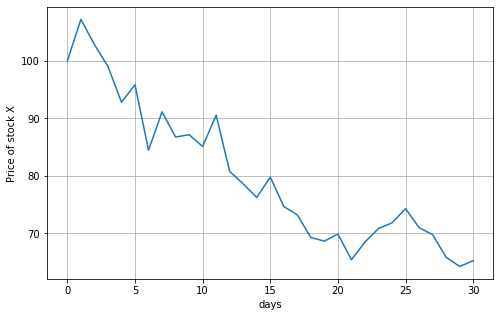

In [114]:
# stock price evolution
from numpy.random import normal, seed 
from matplotlib import pyplot as plt 
import math

#initial price
S = 100
mu = -0.01 
sigma = 0.05 
T=1
seed(1) 
historical_series = [S0]
# 30 days simulation
for i in range(30):
    S = S * math.exp((mu - 0.5 * sigma * sigma) * T +
            sigma * math.sqrt(T) * normal())
    historical_series.append(S)
    
fig = plt.figure(figsize=(8, 5))
plt.plot(range(31), historical_series)
plt.xlabel("days")
plt.ylabel("Price of stock X") 
plt.grid(True)
plt.show()

## Interest Rate Swaps

Interest rate swaps (IRS) consist of a floating leg and a fixed leg. The contract parameters are:

* start date $d_0$
* notional $N$
* fixed rate $K$
* floating rate tenor (months)
* maturity (years)

The floating leg pays the reference LIBOR fixing at a frequency equal to the tenor of the floating rate - so for example an IRS on a 3-month LIBOR will pay a floating coupon every three months, an IRS on 6-month EURIBOR pays the floating coupon every six months and so on.

The fixed leg pays a predetermined cash flow at annual frequency, regardless of the tenor of  the underlying floating rate. For simplicity we will only consider swaps with maturities which are multiples of 1 year.

Before going into the deatils of the valuation of IRSs, we need to modify the `generate_swap_dates` function in our `finmarkets` module to generate the payment dates for both the fixed and floating legs, as follows:

In [94]:
# modify generate_swap_dates
from datetime import date
from dateutil.relativedelta import relativedelta
    
def generate_swap_dates(start_date, n_months, tenor_months=12):
    dates = []
    for n in range(0, n_months, tenor_months):
        dates.append(start_date + relativedelta(months=n))
    dates.append(start_date + relativedelta(months=n_months))
    return dates

generate_swap_dates(date.today(), 16, 3)

[datetime.date(2020, 10, 25),
 datetime.date(2021, 1, 25),
 datetime.date(2021, 4, 25),
 datetime.date(2021, 7, 25),
 datetime.date(2021, 10, 25),
 datetime.date(2022, 1, 25),
 datetime.date(2022, 2, 25)]

Using this function and the contract parameters we will be able to  determine a sequence of payment dates for each of the two legs.

Let $d_0=d_0^{\mathrm{fixed}},...,d_p^{\mathrm{fixed}}$ be the fixed leg payment dates and $d_0=d_0^{\mathrm{float}},...,d_p^{\mathrm{float}}$ be the floating leg payment dates, and let's use the following notation:

* $d$ the pricing date
* $D(d, d')$ the discount factor observed in date $d$ for the value date $d'$
* $F(d, d', d'')$ the forward rate observed in date $d$ for the period $[d', d'']$. The rate tenor is $\tau = d'' - d'$.

The NPV of the fixed leg is calculated as follows:

$$\mathrm{NPV}_{\mathrm{fixed}}(d; K) = N\cdot K\cdot\sum_{i=1}^{n}D(d, d_{i}^{\mathrm{fixed}})$$

while the NPV of the floating leg is calculated as follows:

$$\mathrm{NPV}_{\mathrm{float}}(d) = N\cdot\sum_{i=1}^{m}F(d, d_{j-1}^{\mathrm{float}}, d_{j}^{\mathrm{float}}) \cdot \frac{d_{j}^{\mathrm{float}}-d_{j-1}^{\mathrm{float}}}{360}
\cdot D(d, d_{i}^{\mathrm{float}})$$

Therefore the NPV of the swap (seen from the point of view of the counter-party which receives the floating leg) is

$$\mathrm{NPV}(d; K) = \mathrm{NPV}_{\mathrm{float}}(d) - \mathrm{NPV}_{\mathrm{fixed}}(d;K)$$

For reasons which will become apparent later, it's actually more convenient to express the NPV of an IRS as a function of the fair value fixed rate $S$ of the IRS, also known as the **swap rate**. $S$ is the value of K which makes $\mathrm{NPV}(d)=0$.

On the basis of the previous expressions, we can easiy calculate $S$ as:

$$\mathrm{NPV}_{\mathrm{fixed}}(d;S) = \mathrm{NPV}_{\mathrm{float}}(d)$$
<br>
$$N\cdot S\cdot\sum_{i=1}^{n}D(d, d_{i}^{\mathrm{fixed}}) = N\cdot\sum_{i=1}^{m}F(d, d_{j-1}^{\mathrm{float}}, d_{j}^{\mathrm{float}}) \cdot \frac{d_{j}^{\mathrm{float}}-d_{j-1}^{\mathrm{float}}}{360} \cdot D(d, d_{i}^{\mathrm{float}})$$
<br>
$$S=\frac{\sum_{i=1}^{m}F(d, d_{j-1}^{\mathrm{float}}, d_{j}^{\mathrm{float}}) \cdot \frac{d_{j}^{\mathrm{float}}-d_{j-1}^{\mathrm{float}}}{360}
\cdot D(d, d_{i}^{\mathrm{float}})}{\sum_{i=1}^{n}D(d, d_i^{\mathrm{fixed}})} $$

Once we have calculated $S$, we can express the $\mathrm{NPV}$ of an IRS as follows:

$$\begin{align}&\mathrm{NPV}(d; K) = \mathrm{NPV}_{\mathrm{float}}(d) - \mathrm{NPV}_{\mathrm{fixed}}(d; K) = & \\ \\ &= \underbrace{\mathrm{NPV}_{\mathrm{float}}(d) - \mathrm{NPV}_{\mathrm{fixed}}(d; S)}_{\mathrm{=\;0}} + \mathrm{NPV}_{\mathrm{fixed}}(d;S) - \mathrm{NPV}_{\mathrm{fixed}}(d;K) & \\ & = N\cdot(S-K)\cdot\underbrace{\sum_{i=1}^{n}D(d, d_{i}^{\mathrm{fixed}})}_{\mathrm{'annuity'}}\end{align}$$

Now we can implement an `InterestRateSwap` class to valuate IRS contracts.

In [106]:
# implent InterestRateSap 
class InterestRateSwap:
    
    def __init__(self, start_date, notional, 
                 fixed_rate, tenor_months, 
                 maturity_years):
        self.notional = notional
        self.fixed_rate = fixed_rate
        self.fixed_leg_dates = \
            generate_swap_dates(start_date, 12 * maturity_years)
        self.floating_leg_dates = \
            generate_swap_dates(start_date, 12 * maturity_years,
                                tenor_months)
        
    def annuity(self, discount_curve):
        a = 0
        for i in range(1, len(self.fixed_leg_dates)):
            a += discount_curve.df(self.fixed_leg_dates[i])
        return a

    def swap_rate(self, discount_curve, libor_curve):
        s = 0
        for j in range(1, len(self.floating_leg_dates)):
            F = libor_curve.forward_rate(self.floating_leg_dates[j-1])
            tau = (self.floating_leg_dates[j] - \
                   self.floating_leg_dates[j-1]).days / 360
            P = discount_curve.df(self.floating_leg_dates[j])
            s += F * tau * P
        return s / self.annuity(discount_curve)
        
    def npv(self, discount_curve, libor_curve):
        S = self.swap_rate(discount_curve, libor_curve)
        A = self.annuity(discount_curve)
        return self.notional * (S - self.fixed_rate) * A

For convenience the relevant inputs that will be used later (libor and discount curve definitions) have been saved in the files $\href{https://drive.google.com/file/d/1dm5oZnZKmJM6UrV0L32OcqD5Tzs9SI9A/view?usp=sharing}{\texttt{libor_curve.xlsx}}$ and $\href{https://drive.google.com/file/d/14R22r7m-6VpQ_P79D3qHdK0QN_mOQ_UB/view?usp=sharing}{\texttt{discount_curve.xlsx}}$.

In [100]:
# import xlsx and define discount and libor curves
import pandas as pd
from datetime import date
from finmarkets import DiscountCurve, ForwardRateCurve

pricing_date = date(2019, 11, 23)
start_date = date(2021, 11, 23)
exercise_date = date(2020, 11, 23)

discount_data = pd.read_excel('discount_curve.xlsx')
libor_data = pd.read_excel('libor_curve.xlsx')

dc = DiscountCurve(pricing_date, 
                   discount_data['pillars'].dt.date.tolist(),
                   discount_data['discount_factors'].tolist())

fr = ForwardRateCurve(libor_data['dates'].dt.date.tolist(),
                      libor_data['rates'].tolist())

print(dc.df(date(2020, 1, 1)))
print (fr.forward_rate(date(2020, 1, 1)))

1.000627250829212
0.0558879781420765


Let's test our class instantiating an IRS with 1M notional, fixed rate of 5%, 6 month tenor and a maturity of 4 years; discount and libor curves are the same as before.

In [101]:
# test it
pricing_date = date(2019, 11, 23)
irs = InterestRateSwap(pricing_date, 1e6, 0.05, 6, 4)
print ("{:.2f} EUR".format(irs.npv(dc, fr)))

54435.45 EUR


Can you guess what could be the swap rate given that the npv is negative ? 

(Remember that we are looking at this contracts from the point of view of the receiver of the floating leg...)

In [103]:
# check the swap rate
print ("{}".format(irs.swap_rate(dc, fr)))

0.06351043924307838


To check if the we have computed correctly the swap rate we can instanciate a new IRS with fixed rate equal to the just calculated swap rate and print its NPV, it should come very close to 0.

In [104]:
irs2 = InterestRateSwap(pricing_date, 1e6, 0.01025425, 6, 4)
print ("{:.2f} EUR".format(irs2.npv(dc, fr)))

214576.63 EUR


## Inheritance

At this point we have implemented two swap classes and we can try an alternative approach, inheritance. 
This is just for illuatration since, as we will see, there is not much code to share between $\tt{InterestRateSwap}$ and $$\tt{OvernightIndexSwap}$.

In [105]:
# inheritance
class GenericSwap:
    def __init__(self, start_date, notional, fixed_rate, maturity_years, tenor_months=12): 
        self.notional = notional
        self.fixed_rate = fixed_rate self.fixed_leg_dates = \
        generate_swap_dates(start_date, 12 * maturity_years) self.floating_leg_dates = \
        generate_swap_dates(start_date, 12 * maturity_years, tenor_months) self.maturity = maturity_years

    def npv(self):
        print ("{} doesn't implement npv method.".format(self.__name__))

class OvernightIndexSwap(GenericSwap):
    def npv_floating_leg(self, discount_curve):
        return self.notional * (discount_curve.df(self.floating_leg_dates[0]) - discount_curve.df(self.floating_leg_dates[-1]))

    def npv_fixed_leg(self, discount_curve): 
        npv = 0
        for i in range(1, len(self.fixed_leg_dates)): 
            start_date = self.fixed_leg_dates[i-1] 
            end_date = self.fixed_leg_dates[i]
            tau = (end_date - start_date).days / 360 
            df = discount_curve.df(end_date)
            npv += df * tau
        return self.notional * self.fixed_rate * npv

    def npv(self, discount_curve):
        float_npv = self.npv_floating_leg(discount_curve) 
        fixed_npv = self.npv_fixed_leg(discount_curve) 
        return float_npv - fixed_npv

class InterestRateSwap(GenericSwap): 
    def annuity(self, discount_curve):
        a=0
        for i in range(1, len(self.fixed_leg_dates)):
            a += discount_curve.df(self.fixed_leg_dates[i])
        return a

    def swap_rate(self, discount_curve, libor_curve): 
        s=0
        for j in range(1, len(self.floating_leg_dates)):
            F = libor_curve.forward_rate(self.floating_leg_dates[j-1]) tau = (self.floating_leg_dates[j] - \ self.floating_leg_dates[j-1]).days / 360
            P = discount_curve.df(self.floating_leg_dates[j])
            s += F * tau * P
        return s / self.annuity(discount_curve)
    
    def npv(self, discount_curve, libor_curve):
        S = self.swap_rate(discount_curve, libor_curve) 
        A = self.annuity(discount_curve)
        return self.notional * (S - self.fixed_rate) * A

SyntaxError: invalid syntax (<ipython-input-105-df3c1e4c869b>, line 5)

## Interest Rate Swaptions

Swaptions are the equivalent of European options for the interest rate markets. They give the option holder the right but not the obligation, at the exercise date $d_{ex}$, to enter into an Interest Rate Swap at a pre-determined fixed rate.

Clearly the option holder will only choose to do this if the NPV of the underlying swap at $d_{ex}$ is positive - looking at the expression for the NPV of the IRS in terms of the swap rate $S$ therefore, we can see that the payoff of the swaption is

$$N\cdot \mathrm{max}(0, S(d_{\mathrm{ex}}) - K)\cdot\sum D(d_{\mathrm{ex}}, d_i^{\mathrm{fixed}})$$

The key issue is now to estimate $S(d_{\mathrm{ex}})$ in order to evaluate the payoff of a swaption. This will be shown with two alternative approaches.

#### Evaluation through Black-Scholes formula

In this case, to evaluate the NPV of this payoff, we'll use a generalization of the Black-Scholes-Merton formula applied to swaptions:

$$\mathrm{NPV} = N\cdot A\cdot [S \mathcal{N}(d_+) - K\mathcal{N}(d_-)]$$

where $\mathcal{N}$ represent a normal distribution

$$d_{\pm} = \frac{\mathrm{log}(\frac{S}{K}) \pm \frac{1}{2}\sigma^{2}T}{\sigma\sqrt{T}}\qquad(\sigma~\textrm{is the volatility of the swap rate})\\$$
$$A =\sum_{i=1}^{p}D(d, d_{i}^{\mathrm{fixed}})\qquad\mathrm{(annuity})$$


As an example let's consider a swaption whose underlying 6M-IRS has a notional of 1M, fixed rate of 1%, and a maturity of 4 years.
In addition we assume a volatility associated to the swap rate of about 7%.

In [107]:
# define function to compute swaption payoff
from math import log
from scipy.stats import norm 
from dateutil.relativedelta import relativedelta

def npvSwaptionBS(irs, sigma, 
                  pricing_date,
                  exercise_date, 
                  discount_curve, libor_curve):
    T = (exercise_date - pricing_date).days / 365
    A = irs.annuity(discount_curve)
    S = irs.swap_rate(discount_curve, libor_curve)
    K = irs.fixed_rate
    N = irs.notional
    
    d_plus = (log(S/K) + 0.5 * sigma**2 * T) / (sigma * T**0.5)
    d_minus = (log(S/K) - 0.5 * sigma**2 * T) / (sigma * T**0.5)
    return irs.notional * A * (S * norm.cdf(d_plus) - K * norm.cdf(d_minus))

sigma = 0.07
irs = InterestRateSwap(pricing_date, 1e6, 0.01, 6, 4)
exercise_date = start_date + relativedelta(years=2)

npv = npvSwaptionBS(irs, sigma, pricing_date, 
                    exercise_date, dc, fr)
print("Swaption NPV with BS: {:.3f} EUR".format(npv))

Swaption NPV with BS: 215601.038 EUR


#### Evaluation through Monte-Carlo Simulation

In this second case we start from the current swap rate $S(d)$ evaluated at the pricing date $d$, and assume that it follows a log-normal stochastic process, i.e. its distribution at $d_{\mathrm{ex}}$ (exercise date) is $S(d_{\mathrm{ex}}) = S(d)\mathrm{exp}(-\frac{1}{2}\sigma^{2}T+\sigma\sqrt{T}\epsilon)$ where $\epsilon\approx\mathcal{N}(0,1)$. 
Notice that it is assumed that the *drift* rate in the evolution of the swap rate is zero.
Given that the discounted payoff is given by:

$$N\cdot \mathrm{max}(0, S(d_{\mathrm{ex}}) - K)\cdot\sum D(d_{\mathrm{ex}}, d_i^{\mathrm{fixed}})$$

to perform the simulation we can:

* sample the normal distribution $\mathcal{N}(0, 1)$ to calculate a large number of scenarios for $S(d_{\mathrm{ex}})$;
* evaluate the underlying swap's NPV at the exercise date, and consequently the swaption's payoff, for each scenario;
* take the average of these values to get the final estimate.

In [108]:
# implement MC swaption payoff
import numpy as np
from math import exp, sqrt
from numpy.random import normal, seed

# define the number of Monte Carlo scenarios
n_scenarios = 50000
discounted_payoffs = []
seed(1)

T = (exercise_date - pricing_date).days / 365
A = irs.annuity(dc)
S = irs.swap_rate(dc, fr)
    
for i_scenario in range(n_scenarios):
    S_simulated = S * exp(-0.5 * sigma * sigma * T +
                          sigma * sqrt(T) * normal())
    
    # calculate the swap NPV in this scenario
    swap_npv = irs.notional * (S_simulated - irs.fixed_rate) * A
    
    # add the discounted payoff of the swaption, in this scenario, to the list
    discounted_payoffs.append(max(0, swap_npv))
    
# calculate the NPV of the swaption 
# by taking the average of the discounted 
# payoffs across all the scenarios
npv_mc = np.mean(discounted_payoffs)
    
print("Swaption NPV: {:.2f} EUR".format(npv_mc))

Swaption NPV: 215740.19 EUR


Note that this is not *strictly speaking* the correct way of calculating the swaption NPV, the reason being that one should calculate the swap NPV at the expiry date of the swaption, apply the payoff function max(0, ...) and *then* discount from the expiry date to today.

However, it's simpler to calculate it as above and it doesn't make any 
difference for the result, since 

$$ DF\cdot \mathrm{max}(0, \mathrm{SwapNPVAtExpiry}) = \mathrm{max}(0, DF \cdot\mathrm{SwapNPVAtExpiry}) $$

### Confidence Interval

From the central limit theorem we know that as $n$ becomes large

$$ \mu_n = \cfrac{1}{n}\sum_i^n Y_i $$

is distributed according to $\mathcal{N}(\mu, \sigma^2/n)$. This means that if ones repeates the swaption MC experiment (e.g. changing the seed of the random number generator) she would obtain results normally distributed around the the *true* value $\mu$

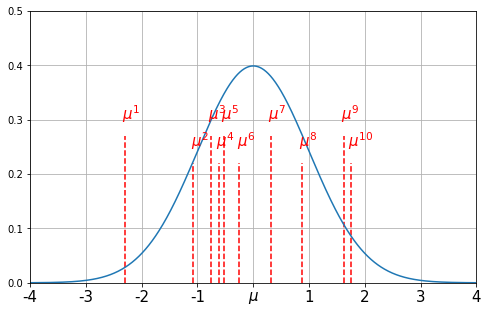

In [112]:
from scipy.stats import norm
np.random.seed(1)
x = sorted(norm.rvs(size=10))
xc = np.arange(-4, 4, 0.01)

fig = plt.figure(figsize=(8,5))
plt.plot(xc, norm.pdf(xc))

for j, i in enumerate(x):
    if j%2 == 0:
        plt.text(i-0.05, 0.3, "$\mu^{}$".format(j+1), color='red', fontsize=15)
        plt.vlines(i, 0, 0.27, color='red', linestyle='--')
    else:
        plt.text(i-0.05, 0.25, "$\mu^{{{}}}$".format(j+1), color='red', fontsize=15)
        plt.vlines(i, 0, 0.22, color='red', linestyle='--')
    
plt.ylim(0, 0.5)
plt.xlim(-4, 4)
plt.xticks((-4, -3, -2, -1, 0, 1, 2, 3, 4), ('-4', '-3', '-2', '-1', '$\mu$', '1', '2', '3', '4'), color='k', size=15)

plt.grid(True)
plt.show()

The higher is $n$ the narrower is the distribution of the results around $\mu$.

Hence:
$$\mu_n - \mu \approx \mathcal{N}(0, \sigma^2/n) $$

<img src="../libro/confidence_interval.png">

So considering one single Monte Carlo experiment we can define an interval so that there is a certain probability to find $\mu$ in there.
Referring to the previous Figure we can write:

$$ \mathbb{P}\left(\mu_n - \cfrac{1.96\sigma}{\sqrt{n}}\le \mu \le \mu_n + \cfrac{1.96\sigma}{\sqrt{n}}\right) = 0.95$$

This interval is called **95% confidence interval** because the shaded part covers 95% of the total area under the Gaussian.

This interval can be interpreted so that if you repeat many times the above simulation, the fraction of calculated confidence intervals that contains the true parameter $\mu$ would tend toward 95%.

The confidence interval can be used to assess the accuracy of the Monte Carlo simulation.

The most common intervals are 99% and 95% confidence levels and are respectively defined as $\pm \cfrac{2.57\sigma}{\sqrt{n}}$ and $\pm \cfrac{1.96\sigma}{\sqrt{n}}$ (in the notes there is the formula to define custom intervals).

So let's calculate the 95% confidence level for the swaption simulation above.

In [115]:
# calculate the MC error estimate as
# 99% confidence interval
npv_error = 1.96 * np.std(discounted_payoffs)/sqrt(n_scenarios)

print("Swaption NPV: {:.2f} EUR (+/‐ {:.2f} EUR with 95% confidence)"\
      .format(npv_mc, npv_error))

Swaption NPV: 215740.19 EUR (+/‐ 316.06 EUR with 95% confidence)


At this point we can check if the two estimated of the swaption payoff are compatible.
The NPV calculated via the Black-Scholes-Merton formula falls within the confidence interval produced by the Monte Carlo simulation, so we can assert that the two methods are in agreement:

* Swaption NPV (BS): €215601
* Swaption NPV (MC): €215740

### Minimization with Constraint

A small petroleum company owns two refineries. Refinery 1 costs `$20,000` per day to operate, and it can produce 400 barrels of high-grade oil, 300 barrels of medium-grade oil, and 200 barrels of low-grade oil each day. Refinery 2 is newer and more modern. It costs `$25,000` per day to operate, and it can produce 300 barrels of high-grade oil, 400 barrels of medium-grade oil, and 500 barrels of low-grade oil each day. The company has orders totaling 25,000 barrels of high-grade oil, 27,000 barrels of medium-grade oil, and 30,000 barrels of low-grade oil. How many days should it run each refinery to minimize its costs and still refine enough oil to meet its orders?

**Hint**: you need to identify the unknown quantities (working days for each refinery) and set the constraints on the production of barrels. The objective is to minimize the costs. If you have multiple constraints you can define a list of dictionaries (one for constraint). Furthermore in this case the constraint is not equal to but rather greater than so you have to set ineq type.

In [122]:
from scipy.optimize import minimize 

def of(x):
    return (20000*x[0] + 25000*x[1])

def cons1(x):
    return 400*x[0] + 300*x[1] - 25000 
def cons2(x):
    return 300*x[0] + 400*x[1] - 27000 
def cons3(x):
    return 200*x[0] + 500*x[1] - 30000

cons = [{"type":"ineq", "fun":cons1}, {"type":"ineq", "fun":cons2}, {"type":"ineq", "fun":cons3}]

x0 = [20, 40]
bounds = [(0, 100) for _ in range(len(x0))]
r = minimize(of, x0, bounds=bounds, constraints=cons) 
print (r)

     fun: 1749913.3099584104
     jac: array([20000., 25000.])
 message: 'Positive directional derivative for linesearch'
    nfev: 8
     nit: 6
    njev: 2
  status: 8
 success: False
       x: array([24.99830893, 49.99788526])


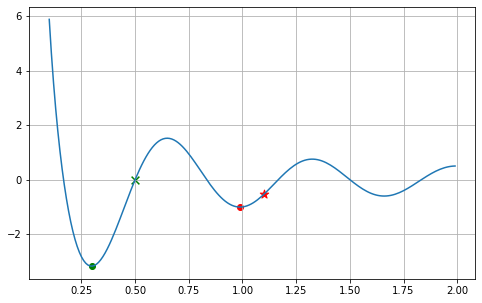

In [86]:
import numpy as np
from math import pi

def func(x):
    return np.cos(3*pi*x)/x

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 5))
x = np.arange(0.1, 2, 0.01)
plt.scatter(0.29691798, func(0.29691798), color="green")
plt.scatter(0.5, func(0.5), color="green", marker="x", s=60)
plt.scatter(0.98865633, func(0.98865633), color="red")
plt.scatter(1.1, func(1.1), color="red", marker="*", s=80)
plt.plot(x, func(x))
plt.grid(True)
plt.show()

In [38]:
from scipy.optimize import minimize
x0 = [1.1]
bounds = [(0.01, 20)]

r = minimize(func, x0, bounds=bounds)
r

      fun: array([-1.00569871])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.4408921e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 5
   status: 0
  success: True
        x: array([0.98865633])

In [39]:
from scipy.optimize import minimize
x0 = [0.5]
bounds = [(0.01, 20)]

r = minimize(func, x0, bounds=bounds)
r

      fun: array([-3.17151711])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.76996262e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 5
   status: 0
  success: True
        x: array([0.29691798])

### Add $\tt{fair\_value\_strike}$ method

$$\mathrm{NPV_{fix}} = N\cdot K\sum_{i=1}^{n}D(d_i)\cfrac{d_i - d_{i-1}}{360}$$

$$\mathrm{NPV_{float}} = N\cdot [D(d_0) - D(d_n)]$$

$$K\sum_{i=1}^{n}D(d_i)\cfrac{d_i - d_{i-1}}{360} = [D(d_0) - D(d_n)]$$

$$K=\cfrac{[D(d_0) - D(d_n)]}{\sum_{i=1}^{n}D(d_i)\cfrac{d_i - d_{i-1}}{360}}$$


In [ ]:
class OverNightIndexSwap: 
    def fair_value_strike(self, discount_curve): 
        den = 0
        for i in range(1, len(self.payment_dates)): 
            start_date = self.payment_dates[i-1] 
            end_date = self.payment_dates[i]
            tau = (end_date - start_date).days / 360 
            df = discount_curve.df(end_date)
            den += df * tau
        num = (discount_curve.df(self.payment_dates[0]) -
               discount_curve.df(self.payment_dates[-1]))
        return num/den

In [ ]:
class OverNightIndexSwap: 
    def fair_value_strike(self, discount_curve): 
        den = self.npv_fixed_leg(discount_curve)/self.fixed_rate
        num = self.npv_floated_leg(discount_curve)
        return num/den